In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.ma as ma
from astropy.table import Table

In [3]:
import copy
t = Table.read('Tgas200_Wright2003_2MASS_FinCat_out.vot', format='votable')
print(t.colnames)


Source = t["Source"]
Gmag = t["X.Gmag."]
Vmag = t["VTmag"]
Jmag = t["Jmag"]
Hmag = t["Hmag"]
Kmag = t["Kmag"]
Qfl = t["Qfl"]






['col1', 'angDist', 'd_arcsec', 'X_RAJ2000', 'X_DEJ2000', 'HIP', 'TYC2', 'Source', 'RA_ICRS', 'e_RA_ICRS', 'DE_ICRS', 'e_DE_ICRS', 'Plx', 'e_Plx', 'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE', 'Dup', 'X.FG.', 'e_.FG.', 'X.Gmag.', 'Var', 'X_RAJ2000.1', 'X_DEJ2000.1', 'TYC1', 'TYC2.1', 'TYC3', 'RAJ2000', 'DEJ2000', 'VTmag', 'BTmag', 'r_SpType', 'Dist', 'Teff', 'SpType', 'X2MASS', 'RAJ2000.1', 'DEJ2000.1', 'errHalfMaj', 'errHalfMin', 'errPosAng', 'Jmag', 'Hmag', 'Kmag', 'e_Jmag', 'e_Hmag', 'e_Kmag', 'Qfl', 'Rfl', 'X', 'MeasureJD']


In [85]:
v = []
for i in range(Vmag):
    v.append(Vmag[i])
print(Vmag[0:100])

TypeError: only integer arrays with one element can be converted to an index

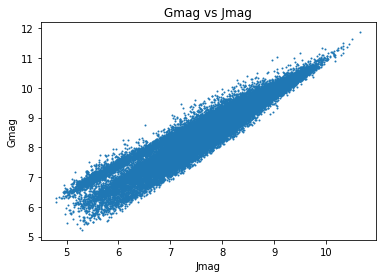

In [8]:
plt.title("Gmag vs Jmag")
plt.scatter(Jmag,Gmag,s=1.0)
plt.xlabel("Jmag")
plt.ylabel("Gmag")
plt.show()

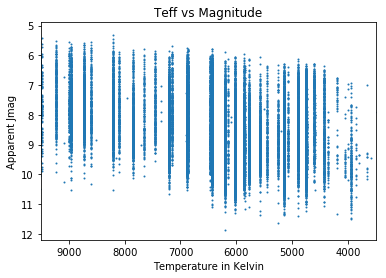

In [3]:
Teff = t["Teff"]
plt.title("Teff vs Magnitude")
plt.scatter(Teff,Gmag,s=1.0)
plt.xlabel("Temperature in Kelvin")
plt.ylabel("Apparent Jmag")
plt.xlim(3500,9500)

plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.show()

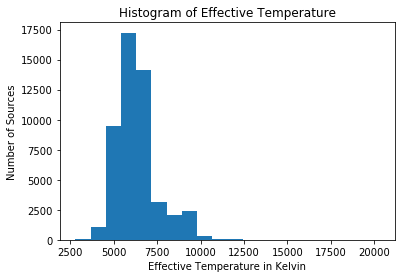

50093


In [73]:
temps = [2000,2500,3000,3500,4000,4500,5000,5500,6000,6500,7000,7500,8000,8500,9000,9500,10000,10500]
test = []
#for i in range(0,len(Teff)):
#    if(Teff[i] >= 5000 & Teff[i] <= 5500):
#        test.append(Teff[i])
#        print(test[i])

bins = 20
plt.xlabel("Effective Temperature in Kelvin")
plt.ylabel("Number of Sources")
plt.title("Histogram of Effective Temperature")
pltemp=plt.hist(Teff,bins)
plt.show()
print(len(Teff))

In [62]:
SpType = t['SpType']
Sp = [0.0]*len(SpType)
SpV = []
SPIII = []
for i in range(0,len(SpType)):
    Spc = SpType[i].decode()
    if(len(Spc) > 2):
        for c in range(0,len(Spc)):
            if(Spc[c] == 'V'):
                Sp[i] = Sp[i] + 5
            if(Sp[c] == 'I'):
                Sp[i] = Sp[i] + 1
            if(Sp[c] == '+'):
                Sp[i] = -1
    else:
        Sp[i] = 5.1
    if(Sp[i] == 6):
        Sp[i] = 4
    if(Sp[i] < 0.0):
        Sp[i] = -1
    if(Sp[i] == 11):
        Sp[i] = 4.5
    if(Sp[i] == 9):
        Sp[i] = 3.5
            
for i in range(0,len(Sp)):
    if(Sp[i] == 5 or Sp[i] == 5.1):
        SpV.append(Sp[i])
    if(Sp[i] ==3 ):
        SpIII.append(Sp[i])
print(len(SpType))        
print(len(Sp))
print(len(SpV))
print(SpV[0:30])

50093
50093
44683
[5.1, 5.1, 5.0, 5.1, 5.1, 5.1, 5.1, 5.1, 5.0, 5.1, 5.1, 5.0, 5.1, 5.0, 5.1, 5.0, 5.0, 5.1, 5.1, 5.0, 5.1, 5.1, 5.0, 5.1, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]


In [6]:
para = t['Plx']
dist = 1000/para
AbsGmag = []
AbsVmag = []
AbsKmag = []
AbsHmag = []
AbsJmag = []

for i in range(len(dist)):
    AbsGmag.append(Gmag[i] + 5 - 5*np.log10(dist[i]))
    AbsVmag.append(Vmag[i] + 5 - 5*np.log10(dist[i]))
    AbsKmag.append(Kmag[i] + 5 - 5*np.log10(dist[i]))
    AbsHmag.append(Hmag[i] + 5 - 5*np.log10(dist[i]))
    AbsJmag.append(Jmag[i] + 5 - 5*np.log10(dist[i]))


GmagV = []
VmagV = []
KmagV = []
HmagV = []
JmagV = []
TotalV = 0

for i in range(len(Sp)):
    if(5 in Sp[i] or 5.1 in Sp[i]):
        GmagV.append(AbsGmag[i])
        VmagV.append(AbsVmag[i])
        KmagV.append(AbsKmag[i])
        HmagV.append(AbsHmag[i])
        JmagV.append(AbsJmag[i])
        TotalV = TotalV + 1
    
        
        
#print('There are ', TotalV, 'Main Sequence stars')
#print(np.mean(VmagV))


In [67]:
GmagV = [] 
VmagV = [] 
KmagV = [] 
HmagV = [] 
JmagV = [] 
TotalV = 0
for i in range(len(Sp)): 
    if('5.0' in str(Sp[i]) or '5.1' in str(Sp[i])): 
        GmagV.append(AbsGmag[i]) 
        VmagV.append(AbsVmag[i]) 
        KmagV.append(AbsKmag[i]) 
        HmagV.append(AbsHmag[i]) 
        JmagV.append(AbsJmag[i]) 
        TotalV = TotalV + 1
#print('There are ', TotalV, 'Main Sequence stars')
#print(np.mean(VmagV))
print(GmagV[0:20])

[4.9333781003952026, 3.1912422180175781, 1.4253931045532227, 2.1855080127716064, 4.1200957298278809, 2.5953497886657715, 4.2365827560424805, 3.4850566387176514, 4.0318682193756104, 3.5499622821807861, 4.8610900640487671, 1.6473186016082764, 4.6379215717315674, 1.8206251859664917, 3.5189621448516846, 4.0145864486694336, 5.4545220136642456, 4.1216914653778076, 2.6535177230834961, 3.3400363922119141]


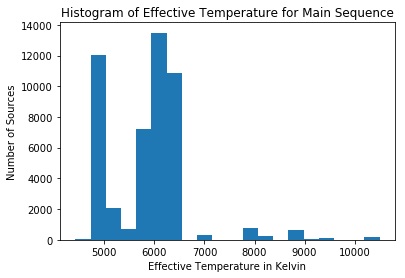

In [71]:
Temps= []
for i in Teff:
    if(Sp[i] in SpV):
        Temps.append(Teff[i])
        

bins = 20
plt.xlabel("Effective Temperature in Kelvin")
plt.ylabel("Number of Sources")
plt.title("Histogram of Effective Temperature for Main Sequence")
pltemp=plt.hist(Temps,bins)
plt.show()

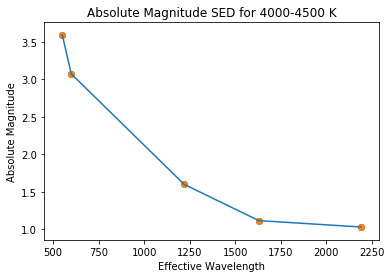

Number of Stars:  43
Average Effective Temp in K:  4420.0
Standard Deviation of Temp in K:  0.0
Min Temp:  4420   Max Temp:  4420
Average Gmag:  3.07484579086
Standard Deviation of Gmag:  0.0


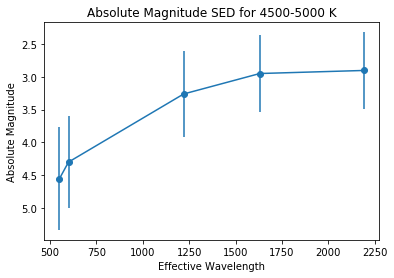

Number of Stars:  12001
Average Effective Temp in K:  4899.8500125
Standard Deviation of Temp in K:  4.74084685534
Min Temp:  4750   Max Temp:  4900
Average Gmag:  4.3019876849
Standard Deviation of Gmag:  0.709757707355


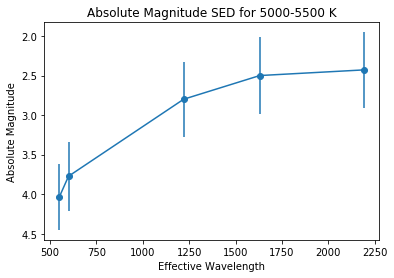

Number of Stars:  2098
Average Effective Temp in K:  5150.0
Standard Deviation of Temp in K:  0.0
Min Temp:  5150   Max Temp:  5150
Average Gmag:  3.77327262708
Standard Deviation of Gmag:  0.43356453939


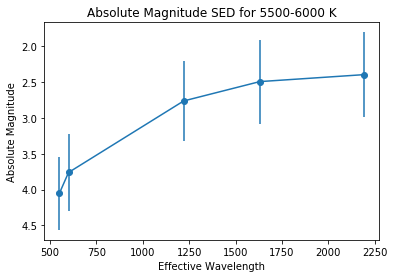

Number of Stars:  7915
Average Effective Temp in K:  5772.19835755
Standard Deviation of Temp in K:  71.8422401108
Min Temp:  5570   Max Temp:  5860
Average Gmag:  3.7616755159
Standard Deviation of Gmag:  0.534246875248


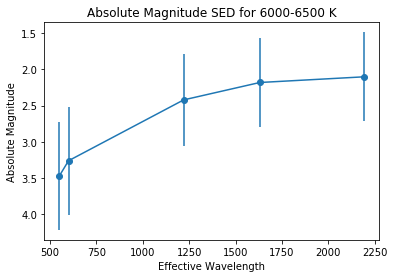

Number of Stars:  24330
Average Effective Temp in K:  6219.45252774
Standard Deviation of Temp in K:  200.44979299
Min Temp:  6030   Max Temp:  6440
Average Gmag:  3.26009180221
Standard Deviation of Gmag:  0.741712749593


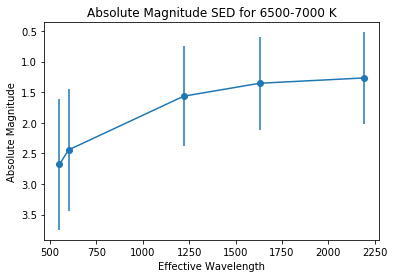

Number of Stars:  317
Average Effective Temp in K:  6881.48264984
Standard Deviation of Temp in K:  9.88947670229
Min Temp:  6870   Max Temp:  6890
Average Gmag:  2.4436807843
Standard Deviation of Gmag:  0.999052941935


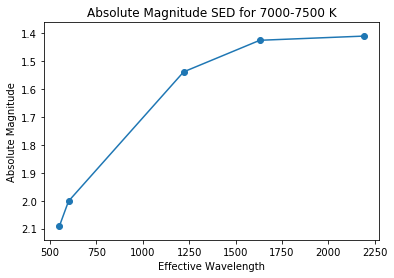

Number of Stars:  1
Average Effective Temp in K:  7450.0
Standard Deviation of Temp in K:  0.0
Min Temp:  7450   Max Temp:  7450
Average Gmag:  2.0018863678
Standard Deviation of Gmag:  0.0


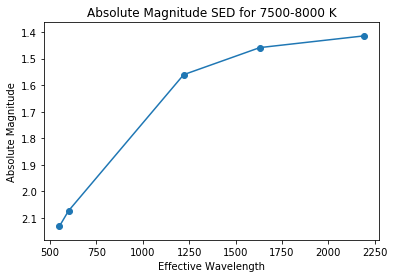

Number of Stars:  743
Average Effective Temp in K:  7850.0
Standard Deviation of Temp in K:  0.0
Min Temp:  7850   Max Temp:  7850
Average Gmag:  2.07353127308
Standard Deviation of Gmag:  0.00420848344472


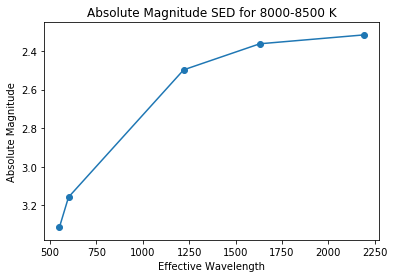

Number of Stars:  265
Average Effective Temp in K:  8200.0
Standard Deviation of Temp in K:  0.0
Min Temp:  8200   Max Temp:  8200
Average Gmag:  3.15742897987
Standard Deviation of Gmag:  0.0


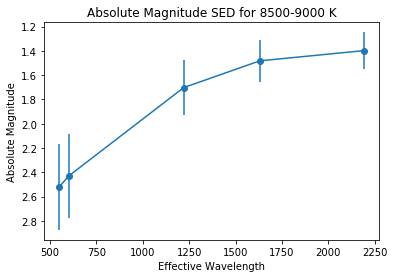

Number of Stars:  746
Average Effective Temp in K:  8750.61662198
Standard Deviation of Temp in K:  87.7474773274
Min Temp:  8600   Max Temp:  9000
Average Gmag:  2.43146386767
Standard Deviation of Gmag:  0.343152287983


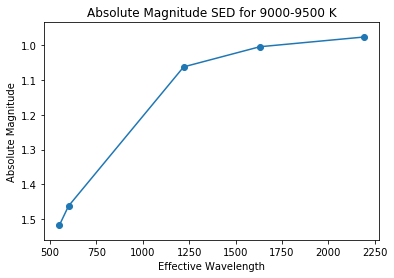

Number of Stars:  82
Average Effective Temp in K:  9000.0
Standard Deviation of Temp in K:  0.0
Min Temp:  9000   Max Temp:  9000
Average Gmag:  1.46285033226
Standard Deviation of Gmag:  0.0


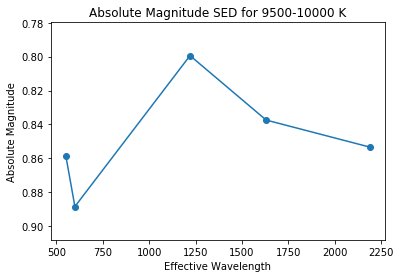

Number of Stars:  138
Average Effective Temp in K:  9520.0
Standard Deviation of Temp in K:  0.0
Min Temp:  9520   Max Temp:  9520
Average Gmag:  0.888413906097
Standard Deviation of Gmag:  0.0


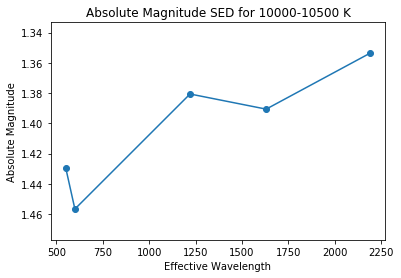

Number of Stars:  206
Average Effective Temp in K:  10500.0
Standard Deviation of Temp in K:  0.0
Min Temp:  10500   Max Temp:  10500
Average Gmag:  1.4566257
Standard Deviation of Gmag:  0.0


In [80]:
Teff = t['Teff']
temps = [4000,4500,5000,5500,6000,6500,7000,7500,8000,8500,9000,9500,10000]
EffWave = [551,600,1220,1630,2190]
# Splits up all main sequence stars based on their effective temperature

for i in temps:
    sources = 0
    tempRange = []
    GmagV = []
    VmagV = []
    KmagV = []
    HmagV = []
    JmagV = []
    for j in Teff:
        if(Sp[j] in SpV):
            if(i <= Teff[j] <= i+500):
                tempRange.append(Teff[j])
                GmagV.append(AbsGmag[j])
                VmagV.append(AbsVmag[j])
                KmagV.append(AbsKmag[j])
                HmagV.append(AbsHmag[j])
                JmagV.append(AbsJmag[j])
                sources = sources + 1
    MeanTemp = np.mean(tempRange)
    MinTemp = np.min(tempRange)
    MaxTemp = np.max(tempRange)
    TempStd = np.std(tempRange)
    MeanGmag = np.mean(GmagV)
    MeanVmag = np.mean(VmagV)
    MeanHmag = np.mean(HmagV)
    MeanJmag = np.mean(JmagV)
    MeanKmag = np.mean(KmagV)
    GmagStd = np.std(GmagV)
    HmagStd = np.std(HmagV)
    VmagStd = np.std(VmagV)
    JmagStd = np.std(JmagV)
    KmagStd = np.std(KmagV)
    Mags = [MeanVmag,MeanGmag,MeanJmag,MeanHmag,MeanKmag]
    #Mags = [MeanKmag,MeanHmag,MeanJmag,MeanGmag,MeanVmag]
    plt.xlabel('Effective Wavelength')
    plt.ylabel('Absolute Magnitude')
    plt.title('Absolute Magnitude SED for '+ str(i)+'-'+ str(i+500) + ' K')
    plt.scatter(EffWave,Mags)
    plt.gca().invert_yaxis()
    plt.errorbar(EffWave,Mags,[VmagStd,GmagStd,JmagStd,HmagStd,KmagStd])
    plt.show()
    
    print('Number of Stars: ', sources)
    print('Average Effective Temp in K: ', MeanTemp)
    print('Standard Deviation of Temp in K: ', TempStd)
    print('Min Temp: ', MinTemp, '  Max Temp: ', MaxTemp)
    print('Average Gmag: ', MeanGmag)
    print('Standard Deviation of Gmag: ',GmagStd)
    #print(MeanVmag)
        

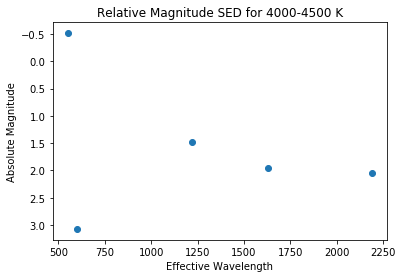

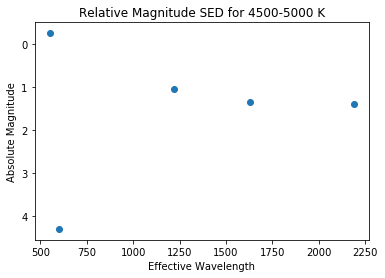

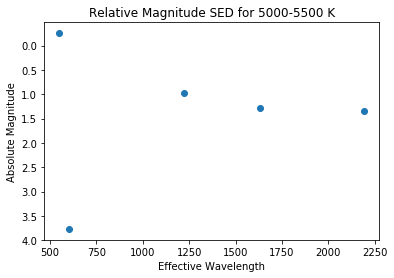

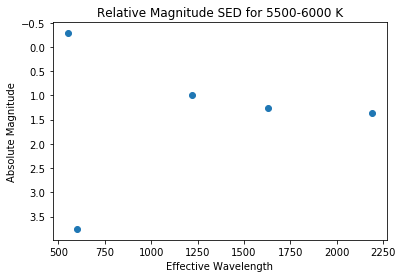

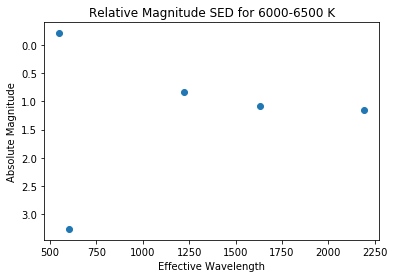

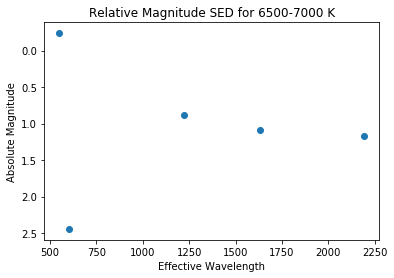

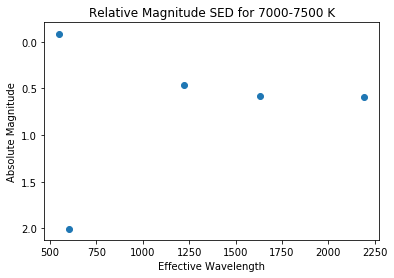

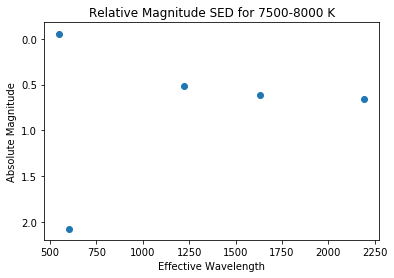

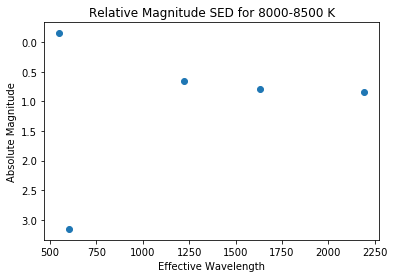

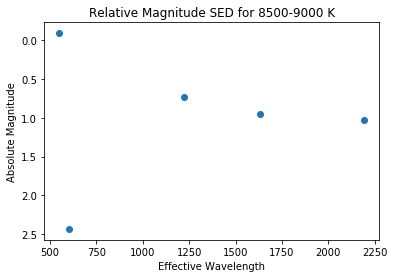

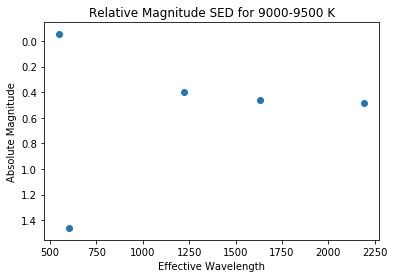

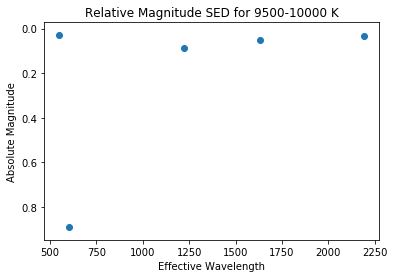

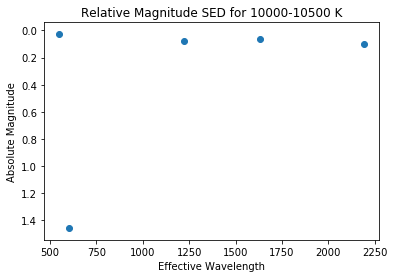

In [76]:
for i in temps:
    sources = 0
    tempRange = []
    GmagV = []
    VmagV = []
    KmagV = []
    HmagV = []
    JmagV = []
    for j in Teff:
        if(Sp[j] in SpV):
            if(i <= Teff[j] <= i+500):
                tempRange.append(Teff[j])
                GmagV.append(AbsGmag[j])
                VmagV.append(AbsGmag[j]-AbsVmag[j])
                KmagV.append(AbsGmag[j]-AbsKmag[j])
                HmagV.append(AbsGmag[j]-AbsHmag[j])
                JmagV.append(AbsGmag[j]-AbsJmag[j])
                sources = sources + 1
    
    MeanGmag = np.mean(GmagV)
    MeanVmag = np.mean(VmagV)
    MeanHmag = np.mean(HmagV)
    MeanJmag = np.mean(JmagV)
    MeanKmag = np.mean(KmagV)
    
    Mags = [MeanVmag,MeanGmag,MeanJmag,MeanHmag,MeanKmag]
    #Mags = [MeanKmag,MeanHmag,MeanJmag,MeanGmag,MeanVmag]
    plt.xlabel('Effective Wavelength')
    plt.ylabel('Absolute Magnitude')
    plt.title('Relative Magnitude SED for '+ str(i)+'-'+ str(i+500) + ' K')
    plt.scatter(EffWave,Mags)
    plt.gca().invert_yaxis()
    plt.show()
    

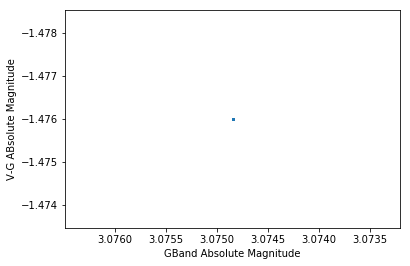

5
4420.0


In [56]:
VmG = np.array(JmagV) - np.array(GmagV)
plt.xlabel('GBand Absolute Magnitude')
plt.ylabel('V-G ABsolute Magnitude')
plt.scatter(GmagV,VmG,s=1.0)
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.show()

print(len(Mags))
print((MeanGmag))

In [49]:
print(GmagV[0:5])

[1.4566256999969482, 1.4566256999969482, 1.4566256999969482, 1.4566256999969482, 1.4566256999969482]


In [11]:

Teff = t['Teff']
Plx = t["Plx"]

temp = np.linspace(3500,10000,num=14)
print(temp)
#18 sets of ranges
tempRange = []
PlxRange = []
JmagRange = []
GmagRange = []
HmagRange = []
KmagRange = []
VmagRange = []
dist = []
Sp_str = str(Sp)

def AbsoluteMag(mag,dist):
    return mag - (5*np.log10(dist/10))

for low in temp:
    high = low + 500
    for i in range(0,len(Teff)):
        if(low <= Teff[i] <= high):
            if(Teff.mask[i] == False):
                tempRange.append(Teff[i])
                JmagRange.append(Jmag[i])
                GmagRange.append(Gmag[i])
                HmagRange.append(Hmag[i])
                KmagRange.append(Kmag[i])
                VmagRange.append(Vmag[i])
                PlxRange.append(Plx[i])
                dist.append(1000/Plx[i])
    #plt.hist(tempRange,bins=25)
    #TempValMask = ma.masked_outside(temp,low,high)
    #TempValComp = TempValMask.compressed()
    #plt.hist(TempValComp,bins=15)
    #plt.show()    
    for j in range(0,len(tempRange)):
        JmagRange[j] = AbsoluteMag(JmagRange[j],dist[j])
        GmagRange[j] = AbsoluteMag(GmagRange[j],dist[j])
        HmagRange[j] = AbsoluteMag(HmagRange[j],dist[j])
        KmagRange[j] = AbsoluteMag(KmagRange[j],dist[j])
        VmagRange[j] = AbsoluteMag(VmagRange[j],dist[j])
    print("There are ", len(tempRange), " stars in the range", low, " - ", high)
    print("\n","Mean: ", np.mean(tempRange))
    print("Standard Deviation: ", np.std(tempRange))
    print("Max: ", np.max(tempRange))
    print("Min: ", np.min(tempRange))
    print("\n")
    print("Standard Deviation for Absolute Jmag", np.std(JmagRange))
    #print("There are ", len(TempValComp), "in the range", low, " - ", high)
    #tempRange = []

[  3500.   4000.   4500.   5000.   5500.   6000.   6500.   7000.   7500.
   8000.   8500.   9000.   9500.  10000.]
There are  275  stars in the range 3500.0  -  4000.0

 Mean:  3920.14545455
Standard Deviation:  93.6180670562
Max:  4000
Min:  3530


Standard Deviation for Absolute Jmag 

C:\Users\Kevin.Hall\Anaconda3\lib\site-packages\numpy\ma\core.py:4185: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


nan
There are  1131  stars in the range 4000.0  -  4500.0

 Mean:  4259.34571176
Standard Deviation:  219.736430467
Max:  4420
Min:  3530


Standard Deviation for Absolute Jmag nan
There are  6223  stars in the range 4500.0  -  5000.0

 Mean:  4673.33440463
Standard Deviation:  231.626417363
Max:  4900
Min:  3530


Standard Deviation for Absolute Jmag nan
There are  10828  stars in the range 5000.0  -  5500.0

 Mean:  4883.65903214
Standard Deviation:  304.259629527
Max:  5500
Min:  3530


Standard Deviation for Absolute Jmag nan
There are  15768  stars in the range 5500.0  -  6000.0

 Mean:  5168.48236936
Standard Deviation:  494.176794431
Max:  5860
Min:  3530


Standard Deviation for Absolute Jmag nan
There are  36728  stars in the range 6000.0  -  6500.0

 Mean:  5786.07166195
Standard Deviation:  639.840071778
Max:  6470
Min:  3530


Standard Deviation for Absolute Jmag nan
There are  41701  stars in the range 6500.0  -  7000.0

 Mean:  5917.38951104
Standard Deviation:  698.52497

   Jmag  
---------
6.0409999
9.0559998
8.4530001
8.6529999
8.0769997
9.1920004   Plx  
-------
125.156
145.138
195.313
114.679
123.762
 157.48
[0.55373430252075195, 3.2470955848693848, 1.9993500709533691, 3.3555822372436523, 2.6140563488006592, 3.2058689594268799]
